In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns

In [2]:
url = 'https://en.wikipedia.org/wiki/Lists_of_earthquakes'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(status)

In [3]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Lists of earthquakes - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-

In [36]:
def getEarthquakes(soup):
    quakeTable = soup.find('table',{'class':"wikitable"})
    df = pd.read_html(str(quakeTable))
    df = pd.DataFrame(df[0])
    return df

In [34]:
url2 = 'https://en.wikipedia.org/wiki/List_of_earthquakes_in_Chile'
response2 = requests.get(url2)
status2 = response2.status_code
if status2 == 200:
    page2 = response2.text
    soup2 = bs(page2)
else:
    print(status2)

In [38]:
allFrame= getEarthquakes(soup)
chileFrame = getEarthquakes(soup2)

In [55]:
chileFrame2 = chileFrame.drop(['MMI', 'Depth (km)', 'Epicenter', 'Notes', 'Sources'], axis = 1)
chileFrame3 = chileFrame2.dropna()

In [56]:
chileFrame3.head()

,Region,Local date,Mag.,Deaths
7,Concepción,1657-03-15,8.0 MS,40
10,Valparaíso,1730-07-08,8.7 MS/9.1 MW[4],5
15,Valparaíso,1822-11-19,8.5 MS,200
19,Concepción,1835-02-20,8.5/8.2 MS/M?,500
26,Arica,1868-08-13,9.0/8.5 M?/MS,25000


In [49]:
chileFrame3.shape

(34, 4)

In [90]:
chileFrame3['Mag.'] = chileFrame3['Mag.'].replace(' MS', '', regex = True)
chileFrame3['Mag.'] = chileFrame3['Mag.'].replace(' MW', '', regex = True)

In [91]:
chileFrame3.head()

,Region,Local date,Mag.,Deaths
7,Concepción,1657-03-15,8.0,40
15,Valparaíso,1822-11-19,8.5,200
89,Taltal,1965-02-23,7.0,1
90,La Ligua,1965-03-28,7.4,400
95,Illapel,1971-07-08,7.5,90


In [92]:
chileFrame3['Mag.'] = pd.to_numeric(chileFrame3['Mag.'], errors = 'coerce')

In [93]:
chileFrame3 = chileFrame3.dropna()
print(chileFrame3.head())

        Region  Local date  Mag. Deaths
7   Concepción  1657-03-15   8.0     40
15  Valparaíso  1822-11-19   8.5    200
89      Taltal  1965-02-23   7.0      1
90    La Ligua  1965-03-28   7.4    400
95     Illapel  1971-07-08   7.5     90


<Axes: xlabel='Region', ylabel='Mag.'>

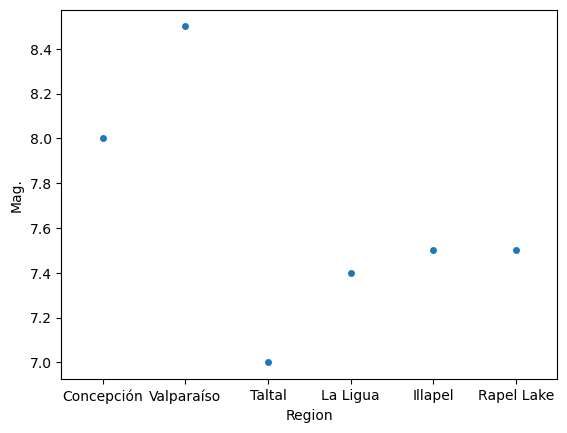

In [94]:
sns.stripplot(data=chileFrame3, x = chileFrame3['Region'], y = chileFrame3['Mag.'])

In [95]:
chileFrame3['Region']

7      Concepción
15     Valparaíso
89         Taltal
90       La Ligua
95        Illapel
103    Rapel Lake
Name: Region, dtype: object